# U-net

## 【事前準備】

In [2]:
# scikit-learnの「set_config(display="diagram")」を使用するため、scikitlearnを最新verに更新
# !pip install scikit-learn==0.23.2 --target drive/My\ Drive/MyModule
# !pip install scikit-learn==0.23.2
!pip install h5py==2.10
!pip install keras==2.2
!pip install keras-applications==1.0.7
!pip install tensorflow==1.14
!pip install tensorflow-gpu==1.14.0
# !pip install -q -U albumentations   # データ拡張用ライブラリ
!pip list
## Google Drive上にインストールしたモジュールのインポート##
import sys
sys.path.append('/content/drive/My Drive/MyModule')

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
     |████████████████████████████████| 300 kB 5.3 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account al

In [3]:
## モジュールのインポート ##
# 一般
import random
import math
# データ分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
# 決定木可視化のためのツール
import graphviz
import pydotplus
# from IPython.display import Image
from sklearn.externals.six import StringIO
# TensorFlow
import tensorflow as tf
# Keras
# from keras.datasets import mnist
# 画像データ編集
from PIL import Image
import cv2
import albumentations as A
# その他
import os
import glob 
import re
import xml.etree.ElementTree as ET 
from google.colab import drive #GoogleDriveモジュール
drive.mount('/content/drive') #GoogleDriveのマウント
# os.chdir('/content/drive/My Drive/DIVE INTO CODE/Sprint/Sprint17/ObjectDetection-master')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518

Mounted at /content/drive


KaggleのTGS Salt Identification Challengeのデータセットを使用し、セグメンテーションを行います。


TGS Salt Identification Challenge | Kaggle


セグメンテーション手法としてU-Net[1]を使います。


[1]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015


https://arxiv.org/pdf/1505.04597.pdf

## 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。

zhixuhao/unet: unet for image segmentation
（https://github.com/zhixuhao/unet）


《GPU環境での学習》


大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。


《新たなデータセットの適用》


公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。

### ●【動作確認】モデルに元々含まれていた細胞データを用いてセグメンテーション

In [93]:
%%time
# .pyフォルダの保管場所へ移動
os.chdir('/content/drive/MyDrive/DIVE INTO CODE/Sprint/Sprint19/unet-master')
!ls

# # 学習実行
# !python main.py

# U-netの各パッケージをインポート
from data import *
from model import *

# バッチデータ作成
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label', data_gen_args, save_to_dir=None)

# U-netのモデルをインスタンス化
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)

# 学習
model.fit_generator(myGene,steps_per_epoch=300, epochs=1,callbacks=[model_checkpoint])

data		   main.py	    unet_membrane_best.hdf5
dataPrepare.ipynb  model2.py	    unet_membrane.hdf5
data.py		   model.py	    unet_membrane_kaggle.hdf5
img		   __pycache__	    unet_salt_identification_challenge.hdf5
LICENSE		   README.md
main.bak	   trainUnet.ipynb


/content/drive/MyDrive/DIVE INTO CODE/Sprint/Sprint19/unet-master/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/1
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
300/300 [==============================] - 153s 511ms/step - loss: 0.3476 - acc: 0.8418

Epoch 00001: loss improved from inf to 0.34756, saving model to unet_membrane.hdf5
CPU times: user 2min 1s, sys: 3.2 s, total: 2min 5s
Wall time: 2min 43s


In [94]:
# テストデータを生成
testGene = testGenerator("data/membrane/test")

# 推定
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

/content/drive/MyDrive/DIVE INTO CODE/Sprint/Sprint19/unet-master/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


30/30 [==============================] - 11s 363ms/step


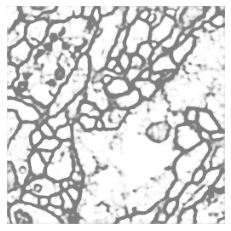

In [96]:
# 画像ファイル読み込み
image = cv2.imread('./data/membrane/test/0_predict.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image);

### ●【本番】KaggleのTGS Salt Identification Challengeのデータセットを用いてセグメンテーション

In [89]:
%%time
# .pyフォルダの保管場所へ移動
os.chdir('/content/drive/MyDrive/DIVE INTO CODE/Sprint/Sprint19/unet-master')
!ls

# # 学習実行
# !python main.py

# U-netの各パッケージをインポート
from data import *
from model import *

# バッチデータ作成
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/salt_identification_challenge/train','image','label', data_gen_args, save_to_dir=None)

# U-netのモデルをインスタンス化
model = unet()
model_checkpoint = ModelCheckpoint('unet_salt_identification_challenge.hdf5', monitor='loss',verbose=1, save_best_only=True)

# 学習
model.fit_generator(myGene,steps_per_epoch=2000, epochs=1,callbacks=[model_checkpoint])

data		   LICENSE    model.py	       unet_membrane_best.hdf5
dataPrepare.ipynb  main.bak   __pycache__      unet_membrane.hdf5
data.py		   main.py    README.md        unet_membrane_kaggle.hdf5
img		   model2.py  trainUnet.ipynb


Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/content/drive/MyDrive/DIVE INTO CODE/Sprint/Sprint19/unet-master/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/1
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
2000/2000 [==============================] - 936s 468ms/step - loss: 0.4899 - acc: 0.7707

Epoch 00001: loss improved from inf to 0.48985, saving model to unet_salt_identification_challenge.hdf5
CPU times: user 11min 5s, sys: 15.6 s, total: 11min 21s
Wall time: 15min 41s


In [90]:
# テストデータを生成
testGene = testGenerator("data/salt_identification_challenge/test", num_image=10)

# 推定
model = unet()
model.load_weights("unet_salt_identification_challenge.hdf5")
results = model.predict_generator(testGene,10,verbose=1)
saveResult("data/salt_identification_challenge/test",results)

/content/drive/MyDrive/DIVE INTO CODE/Sprint/Sprint19/unet-master/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


10/10 [==============================] - 2s 241ms/step


/content/drive/MyDrive/DIVE INTO CODE/Sprint/Sprint19/unet-master/data.py:124: UserWarning: data/salt_identification_challenge/test/0_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/MyDrive/DIVE INTO CODE/Sprint/Sprint19/unet-master/data.py:124: UserWarning: data/salt_identification_challenge/test/1_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/MyDrive/DIVE INTO CODE/Sprint/Sprint19/unet-master/data.py:124: UserWarning: data/salt_identification_challenge/test/2_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/MyDrive/DIVE INTO CODE/Sprint/Sprint19/unet-master/data.py:124: UserWarning: data/salt_identification_challenge/test/3_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/MyDrive/DIVE INTO CODE/Sprint/Sprint19/unet-master/data.py:124: U

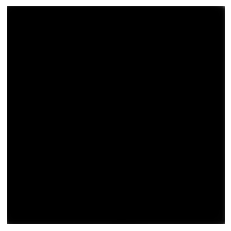

In [97]:
# 画像ファイル読み込み
image = cv2.imread('./data/salt_identification_challenge/test/0_predict.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image);

In [43]:
# !rm ./data/salt_identification_challenge/test/0_predict.png
# !rm ./data/salt_identification_challenge/test/1_predict.png
# !rm ./data/salt_identification_challenge/test/2_predict.png
# !rm ./data/salt_identification_challenge/test/3_predict.png
# !rm ./data/salt_identification_challenge/test/4_predict.png
# !rm ./data/salt_identification_challenge/test/5_predict.png
# !rm ./data/salt_identification_challenge/test/6_predict.png
# !rm ./data/salt_identification_challenge/test/7_predict.png
# !rm ./data/salt_identification_challenge/test/8_predict.png
# !rm ./data/salt_identification_challenge/test/9_predict.png

## [Upper]Membrane Predicted Image (Sample Image) ##
## [Lower]Salt Identification Predicted Image ##


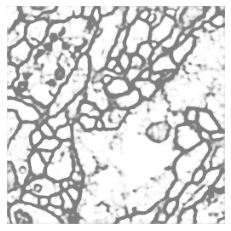

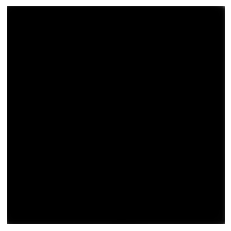

In [104]:
# predict imageを再度表示
print("## [Upper]Membrane Predicted Image (Sample Image) ##")
print("## [Lower]Salt Identification Predicted Image ##")
plt.figure()
image = cv2.imread('./data/membrane/test/0_predict.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image);

plt.figure()
image = cv2.imread('./data/salt_identification_challenge/test/0_predict.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image);


### 【問題1 解答】
U-netのモデルを用いてセグメンテーションを行ったところ、モデルに元から含まれていたmembraneの画像データについては、若干色が薄いもののある程度は期待通りのセグメンテーション結果が得られた。

一方、KaggleのSalt Identification Challengeのデータセットについては、全て真っ黒かグレーのどちらかとなってしまい、期待するような白色と黒色の領域分けが実現できなかった。fit_generatorメソッドのepoch数やsteps_per_epoch等の学習条件を色々変えてみたが、期待するようなセグメンテーション結果が得られなかった。


<u>TO: Mentor様</u>

上記の問題の原因や改善案について、もし何かアイデアをお持ちでしたらご教示をお願いいたします。

## 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

### 【問題2 解答】
- 主なソースファイルについて、概要を以下に記載する。

1. main.pyの処理内容
 - ImageDataGeneratorを用いて学習用のバッチデータを作成（データ拡張のオプションあり）
 - U-netのモデルをインスタンス化
 - モデルのfit_generatorメソッドを用いて学習
 - ImageDataGeneratorを用いてテストデータを作成
 - モデルのpredict_generatorメソッドを用いて推定
 - testフォルダに推定セグメンテーションデータを保存


 2. model.pyの処理内容
  - U-netのモデルの構築処理（KerasのFunction APIによる構築）


- 所感
  - 基本的にKerasにデフォルトで備わっている基本的なメソッド（fit_generatorなど）をそのまま使用する形で学習処理や推定処理が実装されており、前回のFaster R-CNNに比べるとソースコードのボリュームは非常に少ない。
  - U-netではダウンサンプリングの過程で画像のコンテキスト情報（全体的な位置情報）が消失するため、それを補うためにアップサンプリングの各レイヤへskipコネクションが接続されていることが特徴の一つであるが、model.pyのモデル構築処理の中でconcatenate処理によりそれが実現されていることを確認できた。



In [87]:
cd label

/content/drive/My Drive/DIVE INTO CODE/Sprint/Sprint19/unet-master/data/salt_identification_challenge/train/label


In [ ]:
ls

In [80]:
rm -r images

In [ ]:
!unzip train.zip

In [83]:
mv label/ train/